<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Machine-Learning/Dimensionality-Reduction-Techniques/PCA/PCA_on_multi_class_wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
wine = load_wine()

In [3]:
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [4]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
X = pd.DataFrame(wine.data, columns = wine.feature_names)
X.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0


In [6]:
X.shape

(178, 13)

In [7]:
y = wine.target
y[:2]

array([0, 0])

# Scaled data

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [10]:
!rm *.*
!ls
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
!cp -a 'gdrive/My Drive/pyfiles/.' './'

gdrive	__pycache__  sample_data
Mounted at /content/gdrive


In [11]:
!ls

bestClassifier.py	 print_model_report.py
gdrive			 __pycache__
get_cross_validation.py  sample_data
get_scaled_features.py	 visualise_2d_dataset_boundaries.py


# check for best classifier for this dataset

In [0]:
from bestClassifier import bestClassifier

LR: 0.965238 (0.034801)
LDA: 0.971905 (0.046969)
KNN: 0.663333 (0.190179)
CART: 0.901429 (0.065120)
RF: 0.965238 (0.055861)
NBG: 0.964762 (0.047581)
NBM: 0.851905 (0.093082)
SVM: 0.408571 (0.130806)


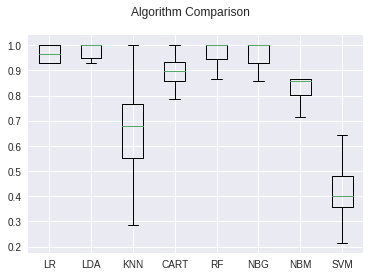

In [13]:
bestClassifier(X_train, y_train)

# Train model

## logisticRegression without PCA

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from print_model_report import print_model_report
model = print_model_report(X_train,y_train, X_test, y_test, model)

 Train score is 0.9859154929577465


Test score is 0.9444444444444444



Train confusion matrix is 
 [[44  1  0]
 [ 0 54  1]
 [ 0  0 42]]

Test confusion matrix is 
 [[13  1  0]
 [ 0 15  1]
 [ 0  0  6]]



classification report is 
              precision    recall  f1-score   support

          0       1.00      0.93      0.96        14
          1       0.94      0.94      0.94        16
          2       0.86      1.00      0.92         6

avg / total       0.95      0.94      0.94        36



### cross_validation_score

In [15]:
from get_cross_validation import get_cross_validation
model = LogisticRegression()
get_cross_validation(X, y, model)

10 fold cross-validation for -- LogisticRegression-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.84210526 0.94444444 0.94444444 0.94444444 0.88888889 1.
 1.         1.         1.         1.        ]


variance in scores for 10 fold cross-validationn for LogisticRegression:-- 0.052492506317112934




'Mean for 10 fold cross-validation score:-- 0.9564327485380117'

# PCA

In [0]:
from sklearn.decomposition import PCA

In [17]:
from get_scaled_features import get_scaled_features
X_scaled = get_scaled_features(X, all_data = True)
X_scaled[:2]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152]])

## check variance for all features

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
variance = pca.explained_variance_ratio_
variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [20]:
import numpy as np
import math
cum_variance = np.cumsum(variance)*100
cum_variance

array([ 36.1988481 ,  55.40633836,  66.52996889,  73.59899908,
        80.16229276,  85.09811607,  89.3367954 ,  92.01754435,
        94.23969775,  96.16971684,  97.90655253,  99.20478511,
       100.        ])

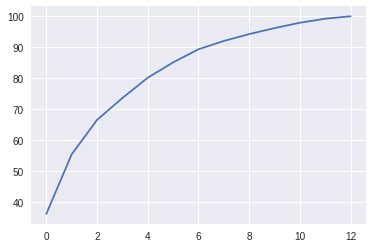

In [21]:
plt.plot(cum_variance)

**^^As we can see most of the variance is described by 10 features so.. we can select 10 features at all**

### Train model

**scaled X_train, X_test because for pca we need scaled features for better result**

In [0]:
from get_scaled_features import get_scaled_features
X_train_scaled, X_test_scaled = get_scaled_features(X_train, X_test)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = print_model_report(X_train_pca, y_train, X_test_pca, y_test, model)

 Train score is 0.9929577464788732


Test score is 1.0



Train confusion matrix is 
 [[45  0  0]
 [ 0 54  1]
 [ 0  0 42]]

Test confusion matrix is 
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]



classification report is 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       1.00      1.00      1.00        16
          2       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        36



## cross_validation with pca

In [24]:
from sklearn.decomposition import PCA
X_pca = PCA().fit_transform(X)
model = LogisticRegression()
get_cross_validation(X_pca, y, model)

10 fold cross-validation for -- LogisticRegression-- Model 


cross validation score for 10 fold cross-validation is:-- 
 [0.94736842 0.94444444 1.         0.94444444 0.94444444 0.94444444
 1.         1.         1.         1.        ]


variance in scores for 10 fold cross-validationn for LogisticRegression:-- 0.027497819755576032




'Mean for 10 fold cross-validation score:-- 0.9725146198830409'

## for visualisation

In [25]:
!ls

bestClassifier.py	 print_model_report.py
gdrive			 __pycache__
get_cross_validation.py  sample_data
get_scaled_features.py	 visualise_2d_dataset_boundaries.py


In [0]:
from visualise_2d_dataset_boundaries import visualise_2d_dataset_boundaries

LogisticRegression Model 



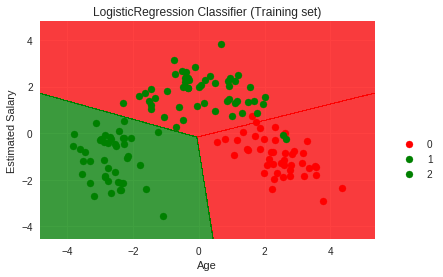

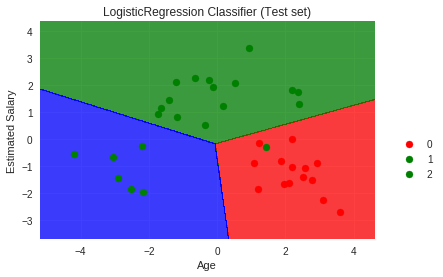

In [29]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_pca, y_train)
%matplotlib inline
visualise_2d_dataset_boundaries(X_train_pca, y_train, X_test_pca, y_test, model, colors = ('red', 'green', 'blue'))